# NUMERICAL SIMULATION LABORATORY- EXERCISE 1- LANZINI
## EXERCISE 01.1


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

Here the results for the excercise 01.1. I test the random generator given by the Professor, checking the uniform random numbers (0 -1) average. I generate 1 000 000 numbers and I created data blocking functions to analyze uncertainties. I divided numbers into 100 blocks and I computed the progressive average and uncertainty.  As expected, the result is compatible with 0.5 and error is compatible with $\frac{1}{12}$ .

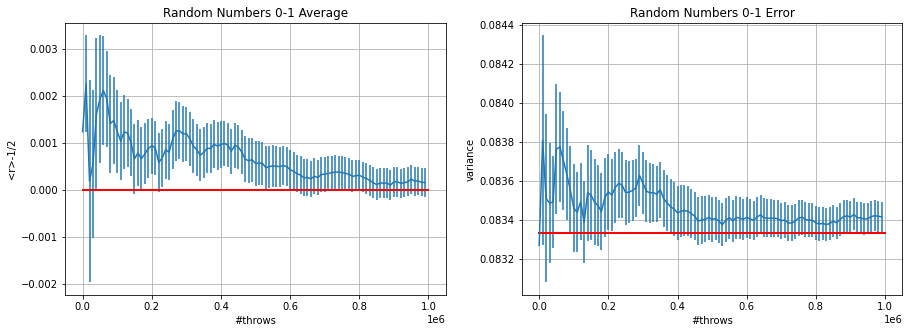

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

n_min=1
n_max=1000000
# Here I created the theoretical average of random numbers between 0 and 1
n_array=np.array([
    int(x)
    for x in np.geomspace(n_min, n_max, num=1000)
])
Theory=np.array([
    0
    for x in np.geomspace(n_min, n_max, num=1000) 
])
ax1.plot(n_array, Theory, color="Red", linewidth=2)
f1=open("data.txt")
x, average, error= np.loadtxt("data.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax1.errorbar(x, average-0.5, error)
ax1.set_xlabel('#throws')
ax1.set_ylabel('<r>-1/2')
ax1.grid(True)
ax1.set_title("Random Numbers 0-1 Average")


# Here I created the theoretical standard deviation 1/12
Theory_std=np.array([
    1/12
    for x in np.geomspace(n_min, n_max, num=1000) 
])

#Plotting standard deviation
f2=open("Varianza.txt")
ax2.plot(n_array, Theory_std, color = "Red", linewidth=2)
throws, variance, error_variance= np.loadtxt("Varianza.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax2.errorbar(throws, variance, error_variance)
ax2.set_xlabel('#throws')
ax2.set_ylabel('variance')
ax2.set_title("Random Numbers 0-1 Error")
ax2.grid(True)



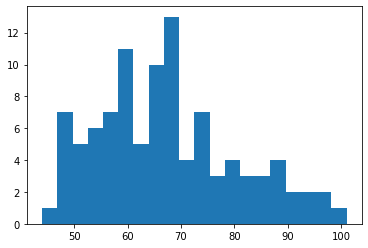

In [3]:
# Test Chi quadro 
f3=open("chi_quadro.txt")
Chi_Squared=np.loadtxt("chi_quadro.txt")
plt.hist(Chi_Squared, bins=20)
plt.show()

## Excercise 01.2



Here the samplings I obtain for an exponential and a Cauchy-Lorentz distribution. These samplings are obtained by using the method of the inversion of the cumulative distribution. Then, for both distributions I see if they respect the central limit theorem. This is true for the exponential, whose average distribution converges to a gaussian of $\mu =1$. However, It's false for the Cauchy-Lorentz distribution, whose average distribution is still a Cauchy-Lorentz with the same mean value, but a smaller $\Gamma$.

Text(0.5, 1.0, 'Histogram exponential average N=100')

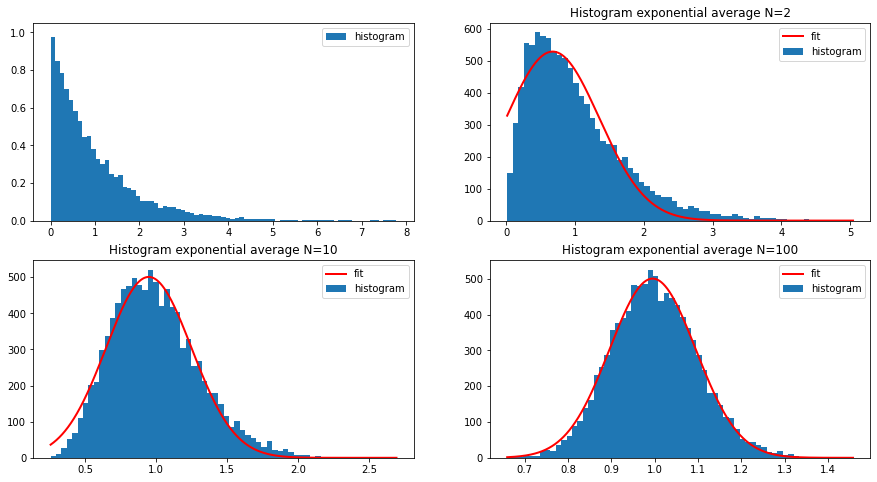

In [4]:
# Exponential distribution computing the data averages with different N (N=1, 2, 10, 100)
f4=open("exp.txt", "r")
f5=open("exp2.txt", "r")
f6=open("exp10.txt", "r")
f7=open("exp100.txt", "r")

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 8))

def Cauchy_Lorentz(x, mean, amplitude, gamma):
    return amplitude *gamma/((np.pi)*((x-mean)**(2) + gamma**(2)))

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

# N = 1
Exp=np.loadtxt("exp.txt")
bin_heights, bin_borders, _ = ax1.hist(Exp, bins='auto', label='histogram', density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
Theory_exp = np.array([
    np.exp(-x)
    for x in range(0, 10, 10)
])
ax1.plot(Theory_exp, color="Red", linewidth=2)
ax1.legend()
# N = 2

Exp2=np.loadtxt("exp2.txt")

bin_heights, bin_borders, _ = ax2.hist(Exp2, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax2.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
ax2.legend()
ax2.set_title("Histogram exponential average N=2")

# N = 10

Exp10=np.loadtxt("exp10.txt")

bin_heights, bin_borders, _ = ax3.hist(Exp10, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax3.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
ax3.legend()
ax3.set_title("Histogram exponential average N=10")

# N = 100

Exp100=np.loadtxt("exp100.txt")

bin_heights, bin_borders, _ = ax4.hist(Exp100, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax4.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
ax4.legend()
ax4.set_title("Histogram exponential average N=100")


0.03839364922582619 993.8940192160766 0.9991845666080408
-0.0025549710804873785 1005.2852028195064 1.0094328025545938
-0.001024433499823424 993.5551202028579 0.9457348719817085


Text(0.5, 1.0, 'Histogram Cauchy average N=100')

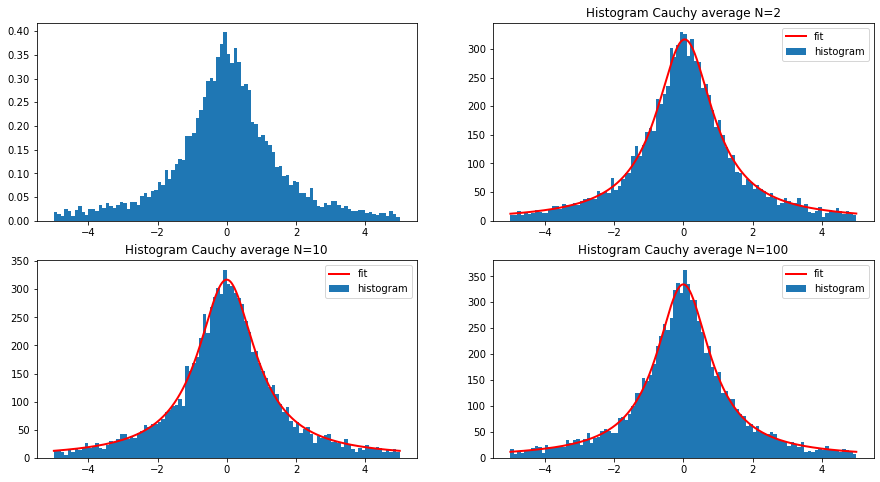

In [5]:
# Cauchy-Lorentz distribution computing the data averages with different N (N=1, 2, 10, 100)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 8))

f8=open("Cauchy.txt", "r")
f9=open("Cauchy2.txt", "r")
f10=open("Cauchy10.txt", "r")
f11=open("Cauchy100.txt", "r")


Cauchy=np.loadtxt("Cauchy.txt")
ax1.hist(Cauchy, bins=100, range=[-5, 5], label='histogram', density=True)



# N = 2

Cauchy2=np.loadtxt("Cauchy2.txt")
bin_heights, bin_borders, _ = ax2.hist(Cauchy2, bins=100, label='histogram', range=[-5, 5])
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Cauchy_Lorentz, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax2.plot(x_interval_for_fit, Cauchy_Lorentz(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
ax2.legend()
print(*popt)
ax2.set_title("Histogram Cauchy average N=2")

# N = 10

Cauchy10=np.loadtxt("Cauchy10.txt")

bin_heights, bin_borders, _ = ax3.hist(Cauchy10, bins=100, label='histogram', range=[-5, 5])
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 #:-1 parte dalla fine della lista e toglie 1--->trovo l'ultimo centro
popt, _ = curve_fit(Cauchy_Lorentz, bin_centers, bin_heights) # fit 

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax3.plot(x_interval_for_fit, Cauchy_Lorentz(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
print(*popt)
ax3.legend()
ax3.set_title("Histogram Cauchy average N=10")



# N = 100

Cauchy100=np.loadtxt("Cauchy100.txt")

bin_heights, bin_borders, _ = ax4.hist(Cauchy100, bins=100, label='histogram', range=[-5, 5])
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Cauchy_Lorentz, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax4.plot(x_interval_for_fit, Cauchy_Lorentz(x_interval_for_fit, *popt), label='fit', color= "red", linewidth=2)
ax4.legend()
print(*popt)
ax4.set_title("Histogram Cauchy average N=100")





# Exercise01.3

I compute the value of $\pi$ with Buffon's experiment. I set to 1 the distance $d$ between two straight lines of the grating and to 0.9 the length $L$ of the needle. At the beginning, I create a counter and set it to 0.
I have to generate a random angle between $-\pi$ to $\pi$ without using the actual value of $\pi$. Therefore, I generate two random numbers $x$ and $y$ between -1 and 1 and check if the point identified by these two coordinates is inside the unitary circle. If not, I reject the numbers and re-generate them. Then, I exctract the random angle $\theta$ between $-\pi$ and $\pi$ in this way: 
$$\theta= arcos(\frac{x}{\sqrt{x^2 + y^2}}) \; \; \;if \; \; \; y>0 $$  
$$\theta= - arcos(\frac{x}{\sqrt{x^2 + y^2}}) \; \; \;if \; \; \; y<=0 $$  
Then I generate the starting point $S$ of the needle with a random number from 0 to 1. I do 100 000 throws. At each throw I increment the counter if one of the two following conditions is respected:
$$ S + L\cdot cos(\theta) > d \;\;\; or \;\;\; S + L\cdot cos(\theta) < 0$$
I obtain the value of $\pi$ in this way:
$$\pi = \frac{2LN_{thr}}{counter*d}$$

I repeat Buffon's experiment 10 000 times to obtain 10 000 values for $\pi$. I analyze data and uncertainties with data blocking and progressive averages and uncertainties.

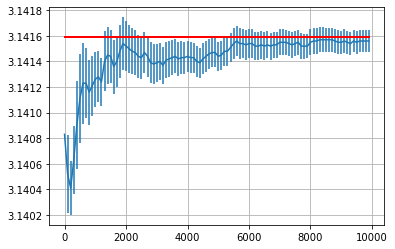

In [6]:
#buffon experiment.
x, buffon, error = np.loadtxt("Buffon.txt",  usecols=(0, 1, 2), delimiter=' ', unpack='true')
plt.errorbar(x, buffon, error)
theory_pi=np.array([
    3.1415926535
    for y in x
])
plt.plot(x, theory_pi, color="Red", linewidth=2)


plt.grid(True)

Here an example of the distribution of $\theta$ generated in one Buffon's experiment. It's almost a perfect uniform distribution between $-\pi$ to $\pi$

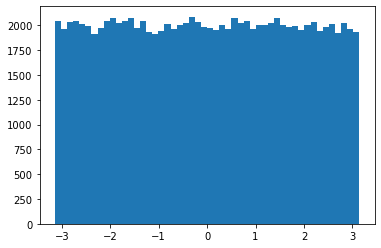

In [7]:
f12=open("theta.txt", "r")
theta = np.loadtxt("theta.txt", unpack='true')
plt.hist(theta, bins=50)
plt.show()